In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ps3_davidhackett12

In [2]:
###############################################################
# Plotting Functions
#
# These are provided, and do not need modifications. You may
# find them useful to debug your code, and see it in operation.
###############################################################

def plot_line(v, color="red"):
    "Plot a large enough line along the vector v"
    v = np.array(v)
    first_point = v/np.linalg.norm(v) * 3.5
    second_point = -v/np.linalg.norm(v) * 3.5
    plt.plot(*list(zip(first_point, second_point)), color=color)
    
def plot_boundary(w, color="red"):
    "Plot the boundary corresponding to a vector w"
    w = np.asarray(w)
    if not np.isclose(w.min(),0):
        # Plot a line perpendicular to w
        plot_line([1/w[0], -1/w[1]], color=color)
    else:
        if np.isclose(w[0], 0):
            plot_line([1, 0], color=color)
        else:
            plot_line([0, 1], color=color)
            
def plot_data(X, y, true_w=None, w=None):
    plt.scatter(X[:,0], X[:,1], c=y)
    if true_w is not None:
        plot_boundary(true_w, color = 'green')
    if w is not None:
        plot_boundary(w, color = 'red')
    plt.show()

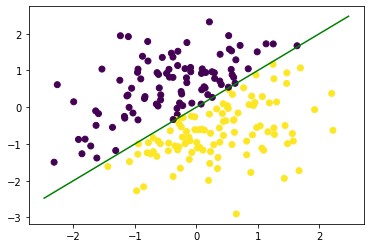

In [3]:
###############################################################
# Generate and plot the data
#
# Usually the data is given. Here, instead, generate it using an
# arbitrary true_w vector.
###############################################################

n = 200
X = np.random.randn(n, 2)
true_w = np.array([1.0, -1.0]) 
y = (X.dot(true_w) >= 0).astype(int)

# Plot the data with the true_w 
# (corresponding boundary is in green)
plot_data(X, y, true_w)

In [4]:
###############################################################
# Implement the perceptron learning rule to learn the vector w
###############################################################

def plr(X, y, w, alpha, num_iterations):
    '''
    Run the perceptron learing rule and return the learned w 
    given the data, learning rate alpha, and number of iterations
    '''
    ############################################################
    # WRITE YOUR CODE IN THE SPACE BELOW
    ############################################################
    last_idx = len(X) - 1
    for _ in range(num_iterations):
        i = np.random.randint(0, last_idx)
        prediction = int((np.dot(w, X[i]) >= 0))
        error = y[i] - prediction
        w = w + (X[i] * alpha * error)
        
    ###########################################################
    
    return w

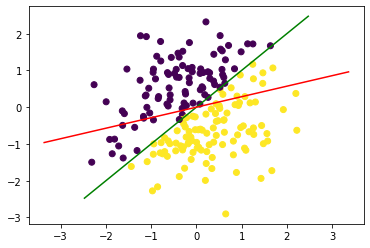

In [16]:
###############################################################
# Initialize w for the perceptron learning rule and plot it
###############################################################

# Initialize w
w = np.array([-2.0, 7.0]).astype(float)

# Plot the data with the arbitrary w 
# (corresponding boundary is in red)
plot_data(X, y, true_w, w)

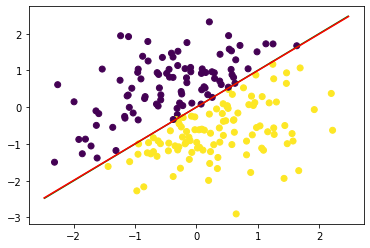

In [17]:
# Run the preceptron learning rule and plot the data
alpha = 0.5
w = plr(X, y, w, alpha, 300)
plot_data(X, y, true_w, w)

# The plot should show that the w returned by plr() has a
# boundary very close to the true boundary.

## Short Answers

a) In the case that the error is -1 that means that w dot x produced a results that is too high and needs to be decreased. In the case of x1 and x2 being positive this means subtracting from both w1 and w2 which will produce 2 smaller numbers (so if you did w * x again it would be smaller). In the case that either x1 or x2 is negative then the corresponding w actually needs to increase so multiplying that number by -1 means its addition again and that w will increase. If both x's are negative then obviously both w's will need to increase for the dot product to shrink so once again multiplying the x's by a negative with add to the w's. 

b) If we chose a very small learning rate the changes in w and the resulting boundary line would be very small, we might run a lot of iterations and never change the line that much and thus never get close to the actual value of w

c) Choosing too large of a learning rate means the changes to w will be large and thus the boundary line. Each error will trigger a huge change in the boundary line and may not be precise enough to get close to the actual line.

d) If we know the true w we could simply check to see if our estimated w is the same line (if slopes are the same). 